# Audio processing of binaural aduio

In [2]:
from scipy.io import wavfile
import torch
import os
import wave
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display 

data_dir = "../data/audio_seg"
files = os.listdir(data_dir)
files_dir = [os.path.join(data_dir, i) for i in files]

## Loading audio

In [3]:
audio, sr = librosa.load(files_dir[0], mono=False, sr=None)
print(audio)

[[-0.14956665 -0.04534912 -0.04238892 ...  0.0222168   0.00088501
  -0.01596069]
 [-0.57876587 -0.53552246 -0.3234558  ...  0.00082397  0.02163696
   0.03671265]]


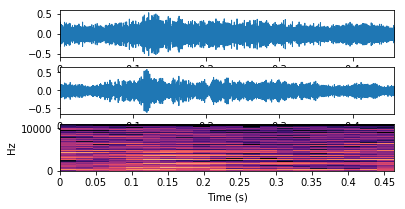

In [183]:
plt.figure()
plt.subplot(4,1,1)
librosa.display.waveplot(audio[0])
plt.subplot(4,1,2)
librosa.display.waveplot(audio[1])
plt.subplot(4,1,3)
stft = librosa.stft(audio[0])
D = librosa.amplitude_to_db(np.abs(stft), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='s')

In [192]:
len(audio[0])

10080

## Segmentation

In [185]:
sec = 5
seg = audio[:, 3*sr:sr*sec]
plt.figure()
plt.subplot(2,1,1)
librosa.display.waveplot(seg[0])
plt.subplot(2,1,2)
librosa.display.waveplot(seg[1])

ParameterError: Buffer is too short (n=0) for frame_length=1

## Save audio

In [27]:
librosa.output.write_wav('seg.wav', seg, sr=sr)

## Mono & mix

In [14]:
audio_mono, sr = librosa.load(files_dir[7], mono=True, sr=None)
to_mono = librosa.to_mono(audio)

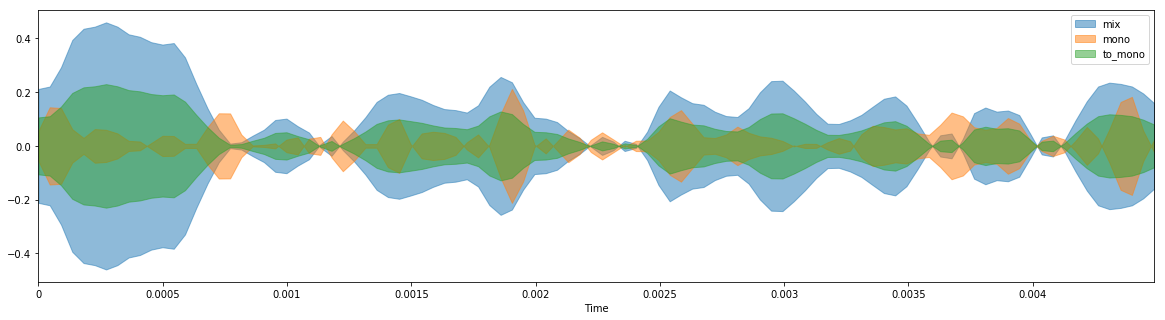

In [15]:
audio_mix = audio[0,:] + audio[1,:]
audio_diff = audio[0,:] - audio[1,:]
plt.figure(figsize=(20,5))

# right = librosa.display.waveplot(audio[1,:100], alpha=0.5)
# left = librosa.display.waveplot(audio[0,:100], alpha=0.5)
mix = librosa.display.waveplot(audio_mix[:100], alpha=0.5)
mono = librosa.display.waveplot(audio_mono[:100], alpha=0.5)
to_mono = librosa.display.waveplot(to_mono[:100], alpha=0.5)
plt.legend([mix, mono, to_mono], ['mix', 'mono', 'to_mono'])

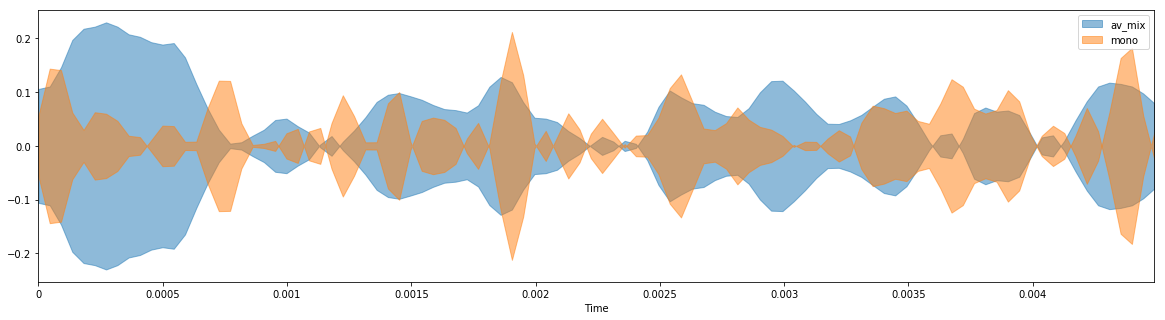

In [16]:
plt.figure(figsize=(20,5))
av_mix = librosa.display.waveplot(audio_mix[:100]/2, alpha=0.5)
mono = librosa.display.waveplot(audio_mono[:100], alpha=0.5)
plt.legend([av_mix, mono], ['av_mix', 'mono'])

## Spectrogram

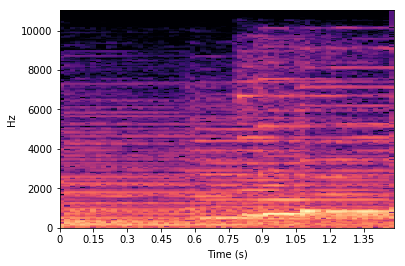

In [17]:
spec = librosa.core.stft(audio_mix, n_fft=512, hop_length=160, win_length=400, center=True)
plt.figure()
D = librosa.amplitude_to_db(np.abs(spec), ref=np.max)
librosa.display.specshow(D, y_axis='linear', x_axis='s')

In [19]:
spec.shape == (257,64)

True

## Normalization

In [154]:
rms = np.sqrt(np.mean(audio_mono**2))
norm_audio = audio_mono * (0.1/rms)
np.sqrt(np.mean(norm_audio**2))

0.1

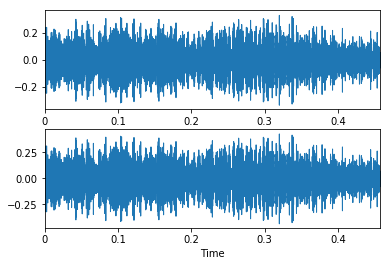

In [155]:
plt.figure()
plt.subplot(2,1,1)
librosa.display.waveplot(norm_audio)
plt.subplot(2,1,2)
librosa.display.waveplot(audio_mono)

In [5]:
len(audio[0])

10080

In [11]:
from tqdm import tqdm
for index in tqdm(range(len(files_dir))):
    audio, sample_rate = librosa.load(files_dir[index], mono=False, sr=None)
    if len(audio[0]) != 10080:
        print(index)

100%|██████████| 1871/1871 [07:51<00:00,  4.07it/s]


In [9]:
audio, sample_rate = librosa.load(files_dir[0], mono=False, sr=None)

In [10]:
len(audio[0])

10080